# Linear Regression of London Fire Rates at Ward Level

1. Read in our processed data
2. Do some correlation analysis
3. Use VIF to deal with multicollinearity
4. Build and interpret the linear regression model

Let's get started by loading the relevant libraries and the data.

In [1]:
import os

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 700) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import statsmodels
print("statsmodels version: ", statsmodels.__version__)
print("pandas version: ", pd.__version__)

statsmodels version:  0.14.4
pandas version:  2.2.3


In [3]:
# setting the working directory - You need to change this to your local directory
#import os
os.chdir('/home/jovyan/work/quant_methods/Assessment/Written Investigation/London Dwelling Fires Analysis')
print(os.getcwd())

/home/jovyan/work/quant_methods/Assessment/Written Investigation/London Dwelling Fires Analysis


## 1. Load the data

In [4]:
# reading in the regression data that we prepared previously
#import pandas as pd 

fire_rates = pd.read_csv('fire_rates_regression_data.csv', encoding="utf-8")
print(f"Data frame 1 is {fire_rates.shape[0]:,} x {fire_rates.shape[1]}")


Data frame 1 is 680 x 16


In [5]:
fire_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WD22CD             680 non-null    object 
 1   WD22NM             680 non-null    object 
 2   Inner_Lon          680 non-null    int64  
 3   FireCount          680 non-null    float64
 4   all_residents      680 non-null    float64
 5   FireRate           680 non-null    float64
 6   all_households     680 non-null    int64  
 7   owned_households   680 non-null    int64  
 8   percent_owned      680 non-null    float64
 9   percent_deprived   680 non-null    float64
 10  percent_crowded    680 non-null    float64
 11  percent_nonwhite   680 non-null    float64
 12  percent_fuel       680 non-null    float64
 13  percent_1parent    680 non-null    float64
 14  unemployed         680 non-null    float64
 15  percent_deprived3  680 non-null    float64
dtypes: float64(11), int64(3), 

In [6]:
fire_rates.head()
fire_rates.describe()

,Inner_Lon,FireCount,all_residents,FireRate,all_households,owned_households,percent_owned,percent_deprived,percent_crowded,percent_nonwhite,percent_fuel,percent_1parent,unemployed,percent_deprived3
count,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000,680.0000
mean,0.3971,53.7426,"12,940.7588",4.1726,"5,035.1544","2,277.2529",45.8335,51.9725,15.7099,45.0940,2.3438,7.7399,4.7824,4.6071
std,0.4896,24.1063,"3,420.1658",1.5792,"1,333.8291","1,025.8783",17.9036,8.9667,6.9669,17.1071,0.8709,3.0618,1.2290,2.1193
min,0.0000,8.0000,"3,955.0000",1.1060,"1,420.0000",328.0000,11.9000,29.0000,2.3000,7.0000,0.7000,1.8000,2.1000,1.0000
25%,0.0000,35.0000,"10,581.2500",3.0165,"4,087.7500","1,504.7500",31.0250,45.6000,10.2750,32.2500,1.7000,5.4000,3.7000,2.9000
50%,0.0000,50.0000,"12,628.5000",3.9190,"4,942.5000","2,126.5000",44.6000,51.6000,15.5000,43.4000,2.3000,7.2000,4.8000,4.3500
75%,1.0000,69.0000,"15,555.5000",5.1647,"5,947.2500","2,935.5000",59.1000,58.5000,20.7000,57.0500,2.8000,9.4000,5.7000,6.1000
max,1.0000,142.0000,"21,981.0000",11.7820,"9,509.0000","5,826.0000",87.5000,74.4000,33.9000,95.5000,6.4000,20.9000,9.9000,14.4000


In [7]:
fire_rates['LogFireRate'] = np.log(fire_rates['FireRate'])
#fire_rates['Log%Deprived3'] = np.log(fire_rates['percent_deprived3'])
#fire_rates['Log%_Fuel'] = np.log(fire_rates['percent_fuel'])
fire_rates['Log%1parent'] = np.log(fire_rates['percent_1parent'])
fire_rates.head()

,WD22CD,WD22NM,Inner_Lon,FireCount,all_residents,FireRate,all_households,owned_households,percent_owned,percent_deprived,percent_crowded,percent_nonwhite,percent_fuel,percent_1parent,unemployed,percent_deprived3,LogFireRate,Log%1parent
0,E05009317,Bethnal Green,1,94.0000,"21,090.0000",4.4570,7251,1682,23.2000,60.2000,25.9000,59.4000,3.2000,7.9000,6.7000,7.5000,1.4945,2.0669
1,E05009318,Blackwall & Cubitt Town,1,97.0000,"21,426.0000",4.5270,9509,2261,23.8000,44.3000,21.3000,58.2000,3.7000,5.2000,6.4000,4.2000,1.5101,1.6487
2,E05009319,Bow East,1,93.0000,"19,526.0000",4.7630,8412,2369,28.2000,49.8000,16.4000,46.5000,3.3000,7.3000,5.7000,5.8000,1.5609,1.9879
3,E05009320,Bow West,1,52.0000,"13,711.0000",3.7930,5276,1666,31.6000,54.8000,18.8000,47.0000,2.2000,5.7000,4.4000,6.0000,1.3332,1.7405
4,E05009321,Bromley North,1,84.0000,"11,702.0000",7.1780,4524,969,21.4000,59.6000,25.8000,68.8000,3.0000,8.8000,6.8000,8.4000,1.9710,2.1748


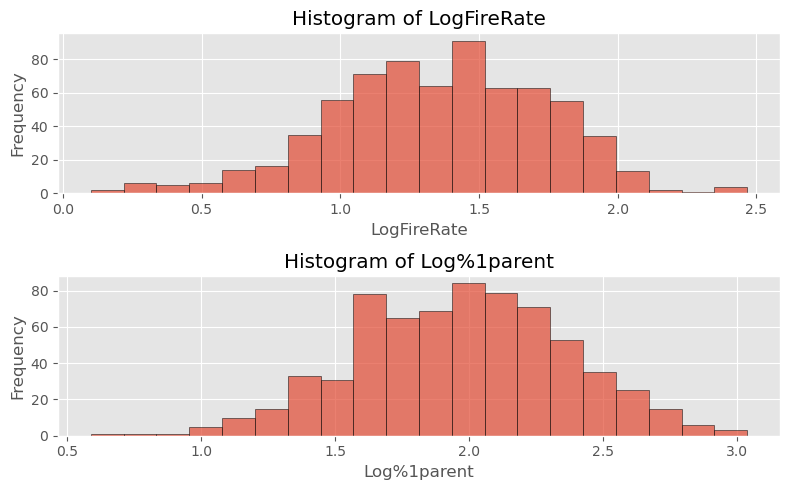

In [23]:
# Select only log transformed columns
cols = ['LogFireRate', 'Log%1parent']
# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(8, 5))

# Plot histograms for each numeric column
for ax, col in zip(axes, cols):
    fire_rates[col].hist(ax=ax, bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
fire_rates_log = fire_rates[['LogFireRate', 'Log%1parent']]


In [10]:
fire_rates_log.describe()

,LogFireRate,Log%1parent
count,680.0000,680.0000
mean,1.3572,1.9703
std,0.3845,0.3940
min,0.1007,0.5878
25%,1.1041,1.6864
50%,1.3658,1.9741
75%,1.6419,2.2407
max,2.4666,3.0397


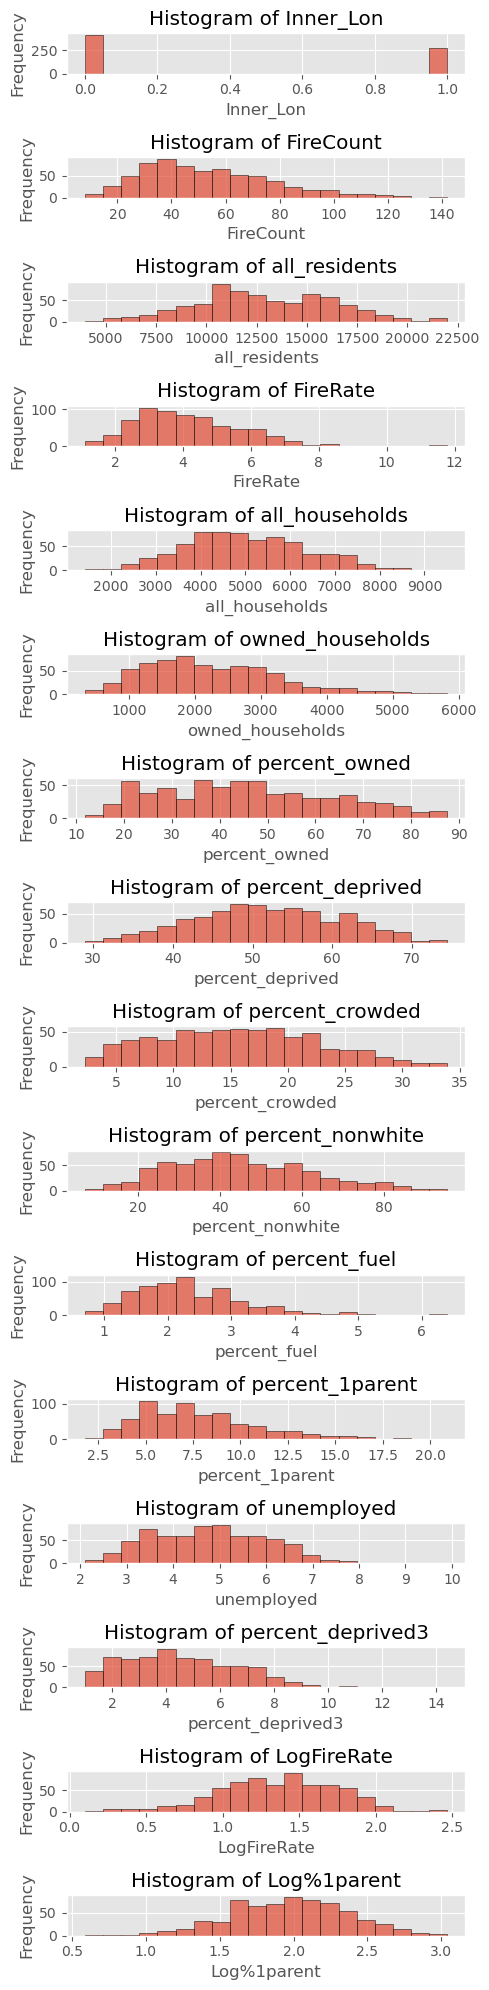

In [11]:
# Select only numeric columns
numeric_cols = fire_rates.select_dtypes(include=[np.number]).columns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(5, 20))

# Plot histograms for each numeric column
for ax, col in zip(axes, numeric_cols):
    fire_rates[col].hist(ax=ax, bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# regression columns before removing multicollinear columns
#regression_columns = ['LogFireRate', 'percent_deprived3', 'percent_fuel', 'Log%1parent', 'percent_owned',  'percent_nonwhite', 'percent_crowded', 'unemployed' , 'Inner_Lon']

# regression columns after removing multicollinear columns
regression_columns = ['LogFireRate', 'percent_deprived3', 'percent_fuel', 'Log%1parent', 'percent_owned',  'percent_nonwhite', 'Inner_Lon']


In [25]:
# drop the columns that are not numeric or not relevant to the regression
#fire_rates_final = fire_rates.drop(columns=['WD22CD', 'WD22NM', 'FireCount', 'all_residents', 'all_households', 'owned_households', 'percent_deprived', 'FireRate'])
fire_rates_final = fire_rates[regression_columns]
fire_rates_final.head()

,LogFireRate,percent_deprived3,percent_fuel,Log%1parent,percent_owned,percent_nonwhite,Inner_Lon
0,1.4945,7.5000,3.2000,2.0669,23.2000,59.4000,1
1,1.5101,4.2000,3.7000,1.6487,23.8000,58.2000,1
2,1.5609,5.8000,3.3000,1.9879,28.2000,46.5000,1
3,1.3332,6.0000,2.2000,1.7405,31.6000,47.0000,1
4,1.9710,8.4000,3.0000,2.1748,21.4000,68.8000,1


## 2. Checking the Correlation between the variables
We will use the ```dataframe.corr()``` function to generate the correlation matrix and plot it.


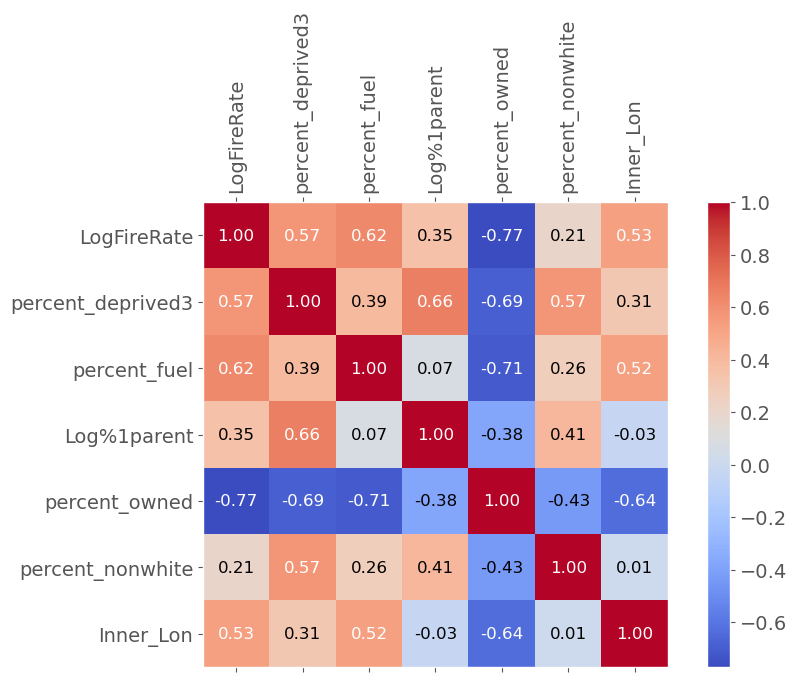

In [26]:
#import numpy as np
#import matplotlib.pyplot as plt

df = fire_rates_final
plt.rcParams["axes.grid"] = False

f = plt.figure(figsize=(10, 6))
corr_matrix = df.corr()  # Compute the correlation matrix

# Create the matrix plot
plt.matshow(corr_matrix, fignum=f.number, cmap='coolwarm')  # Use a diverging colormap
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

# Add colorbar
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Overlay correlation coefficients
for (i, j), val in np.ndenumerate(corr_matrix.values):
    plt.text(
        j, i, 
        f"{val:.2f}",  # Format as 2 decimal places
        ha='center', va='center',
        color="black" if abs(val) < 0.5 else "white",  # Text color based on background
        fontsize=12
    )

# Add a title
#plt.title('Pearson Correlation Matrix with Coefficients', fontsize=16, pad=20)

plt.show()


## 3. Using VIF to deal with multicollinearity

Here we introduce VIF to automatically deal with multicollinearity.

The `Variance Inflation Factor` (VIF) is a measure of multicollinearity among predictors within a multiple regression task. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. More explanation of the theory can be found [here](https://online.stat.psu.edu/stat501/lesson/12/12.4). 

Using VIF to deal with multicollineartiy consists of the following steps:

1. Initialise ```L``` as the list of explanatory variables. (*HINT*: the response variable is not needed for calculating VIF)
2. Calculate the VIF for each variable in ```L``` using the other variables. (*HINT*: the order of computing VIF is irrelevant).
3. If the highest VIF is larger than the threshold, remove the variable from the list ```L```. (*HINT*: each time, no more than one variable is removed from ```L```. This is because removing any variable will affect the VIF of the other variables.)
4. Repeat Step 2-3, until no VIF is larger than the threshold.
5. Return ```L```.

In [27]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [28]:
# using VIF on the fire_rates_final dataset
df_predictors_selected_VIF = drop_column_using_vif_(fire_rates_final.drop('LogFireRate', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['percent_deprived3', 'percent_fuel', 'Log%1parent', 'percent_owned',
       'percent_nonwhite', 'Inner_Lon'],
      dtype='object')


## 4. Linear Regression Model

Now we can fit a linear regression model after dealing with the multicollinearity. There are at least two different ways to forumlate a linear regression model using `statsmodels`.

1. Using `statsmodels.api.formula.ols`. A specific formula is needed.
2. Using `statsmodels.api.OLS`. You don't need to write the formula. Assign the `y` and `X` in the linear regression to the `endog` and `exog` parameters, respectively. 

Now we use the `statsmodels.api.OLS` to build and fit a linear regression model.

In [29]:
model_fire_rates = sm.OLS(endog=fire_rates_final[['LogFireRate']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_fire_rates.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LogFireRate   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     211.7
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          2.69e-151
Time:                        12:39:53   Log-Likelihood:                 46.080
No. Observations:                 680   AIC:                            -78.16
Df Residuals:                     673   BIC:                            -46.51
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5696      0.116     13.527      0.000       1.342       1.797
percent_deprived3     0.0221      0.008      2.911      0.004       0.007       0.037
percent_fuel          0.0911      0.015      6.139      0.000       0.062       0.120
Log%1parent           0.1294      0.032      4.017      0.000       0.066       0.193
percent_owned        -0.0123      0.001    -11.744      0.000      -0.014      -0.010
percent_nonwhite     -0.0050      0.001     -7.531      0.000      -0.006      -0.004
Inner_Lon             0.0159      0.026      0.602      0.548      -0.036       0.068
==============================================================================
Omnibus:                       19.891   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.155
Skew:                          -0.313   Prob(JB):                     3.45e-06
Kurtosis:                       3.705   Cond. No.                         897.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Residual Analysis

We can conduct residual analysis using 'Residual vs. Fitted plot'. We will be usings a residuals vs. fitted plot and a residual histogram plot to check the assumptions of the linear regression model. The assumptions are as follows: 

- Linear relationship
- Independent errors
- Normally distributed errors
- Equal variance

Additionally, it is important to discuss the potential outliers of this model.

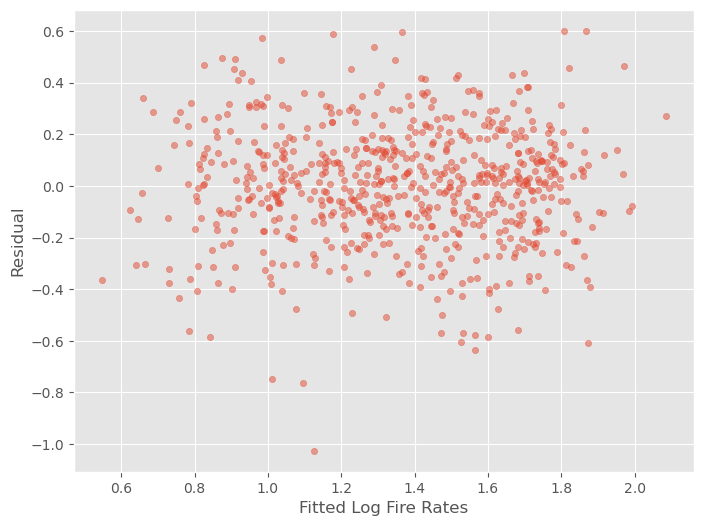

In [30]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(model_fire_rates.fittedvalues, model_fire_rates.resid, alpha = 0.5, s=20)
# plt.scatter(model_fire_rates.fittedvalues, model_fire_rates.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted Log Fire Rates')
plt.ylabel('Residual')
#plt.title('Residual vs. Fitted Plot of Log Fire Rates')
# Adding grid lines
plt.grid(True)
plt.show()

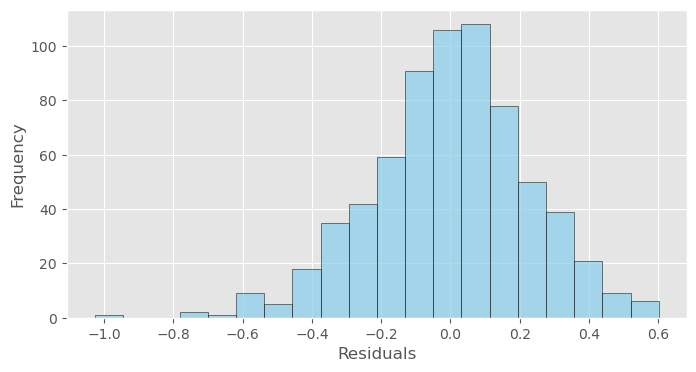

In [31]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 4))  

# Plotting the histogram
plt.hist(model_fire_rates.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
#plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

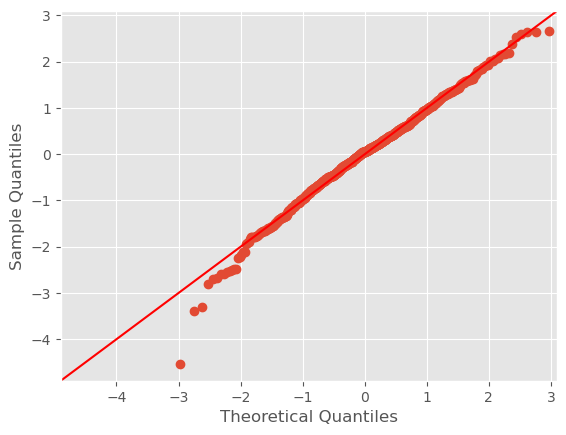

In [32]:
# the QQ plot of residuals
# More details: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
fig = sm.qqplot(model_fire_rates.resid, fit=True, line="45")
#plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

## 6. Discussion of the four conditions of linear regression

- Linear relationship

The points in the residual plot appear to bounce randomly around the x axis (residual=0), with the exception of a few outliers with residuals greater than -0.75. Therefore, it looks like there is a linear relationship between the variables.

- Independent errors

The points in the residual plot are randomly distributed and no clusters/patterns can be seen except the outliers. Therefore, we will conclude that the errors are independently distributed.

- Normally distributed errors

The histogram is asymmetric ans shows a positive skew, with more data points clustered to the right of residual=0.

The QQ plot shows that the residuals deviates from the theoretical quantiles when the residual value is very small but largely conforms.

Therefore, it is not likely that the residuals are normally distributed.

- Equal variance

The points form a horizontal band around residual=0. Therefore, we conclude that the residuals have equal variance.